In [315]:
import numpy as np
import pandas as pd
from scipy import pi
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import hamming
from scipy import signal
import os
from hmmlearn import hmm
import scipy.fftpack
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [295]:
raw_data = pd.read_csv("/Users/thisum/Desktop/MagicHand_Data/sequence_data/accel_test.csv", header=None)
raw_data = raw_data[raw_data[3].isin(['pen'])]
raw_data = raw_data.reset_index(drop=True)
accel_data = raw_data.loc[:, :2]**2
accel_data = accel_data.sum(axis=1)
accel_data = accel_data**(0.5)

avg = np.mean(accel_data)
y = [i - avg for i in accel_data]

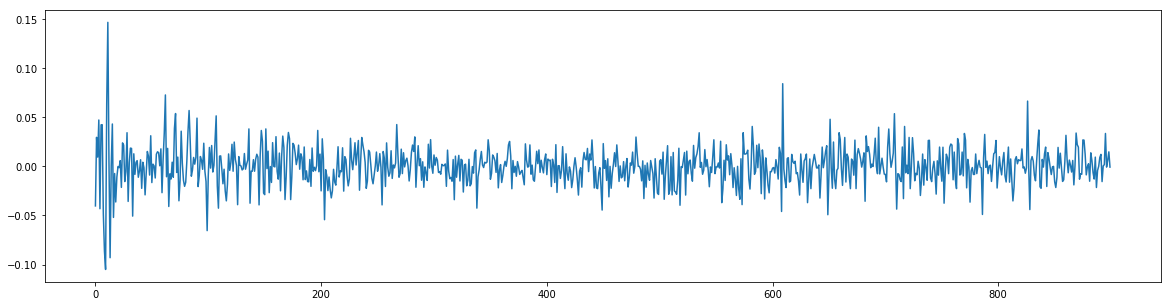

In [296]:
plt.figure(figsize=(20, 5))
plt.plot(y)

/Users/thisum/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


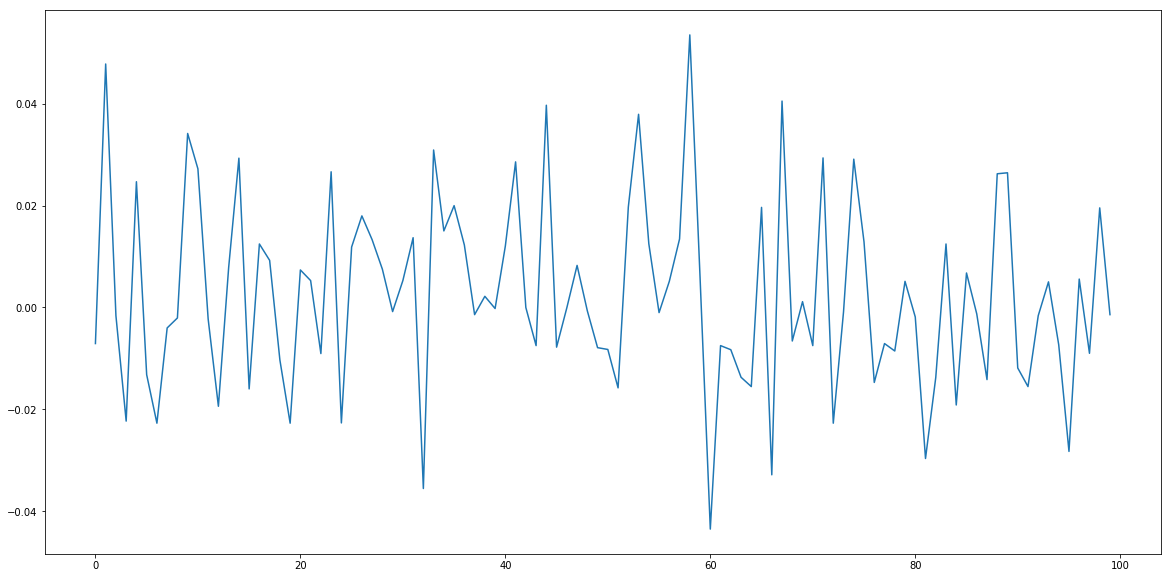

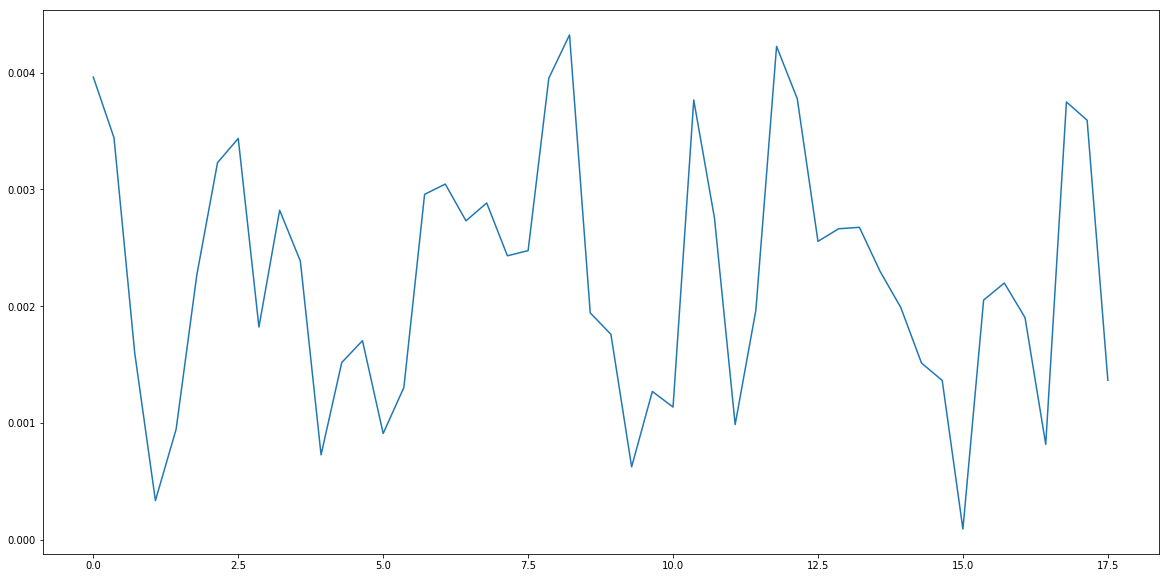

In [306]:
N = 100 # Number of samplepoints
T = 1.0 / 35.0 # sample spacing
begin = 650
x = np.linspace(0.0, N*T, N)

series = y[begin: begin+100]
hamm = np.hamming(len(series))
yf = fftpack.fft(series*hamm)


plt.figure(figsize=(20, 10))
plt.plot(series)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.figure(figsize=(20, 10))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))

plt.show()

In [307]:
flat = yf.real.flatten()
flat.sort()

In [308]:
n = list(yf.real).index(flat[-1])
n*(1.0/(T))/yf.size

0.0

In [262]:
abs(yf[n])**2

16.590707160319543

In [225]:
np.sum([abs(yf[x])**2 for x in range(int(np.floor(0.3*T*yf.size)), int(np.ceil(10*T*yf.size)))])

3.1522848918306012

In [343]:
test_data = pd.read_csv("/Users/thisum/Documents/AppDevelopment/Python/GoD/watch/test.csv", header=None)
lbl_data = test_data.loc[:, 24]
test_data = test_data.loc[:, :23]
test_data = StandardScaler().fit_transform(test_data)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.007708,0.136178,-0.205957,0.301610,-0.043222,0.490928,-1.036075,0.700,0.700,1.400,...,2.952847,1.033683,125.964414,0.466140,0.466140,0.023442,0.023442,0.008206,0.700000,'bottle'
1,-0.002053,0.123241,-0.205957,0.267366,-0.031355,0.421259,-1.027281,0.700,0.700,1.575,...,2.335361,0.770600,131.201675,0.362605,0.362605,0.017800,0.017800,0.005873,1.000000,'bottle'
2,0.001002,0.113524,-0.204876,0.267366,-0.025076,0.446144,-0.857628,1.225,1.225,1.925,...,4.424245,46.108313,108.321760,0.126572,0.126572,0.040844,0.040844,0.425661,1.750000,'bottle'
3,0.010701,0.130119,-0.294146,0.384040,-0.013047,0.327262,-0.526817,0.525,0.525,1.925,...,3.506347,2.700598,96.693034,0.219646,0.219646,0.036263,0.036263,0.027930,0.428571,'bottle'
4,0.008366,0.133150,-0.294146,0.384040,-0.000179,0.112015,-0.616401,0.875,0.875,0.525,...,12.504212,2.973491,165.679733,0.104513,0.104513,0.075472,0.075472,0.017947,1.666667,'bottle'


In [331]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(test_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, lbl_data], axis = 1)
finalDf.head()

,principal component 1,principal component 2,24
0,4.232892,-1.522868,'bottle'
1,3.173001,-1.278312,'bottle'
2,1.985156,3.690967,'bottle'
3,2.410393,0.444053,'bottle'
4,3.707381,3.357701,'bottle'


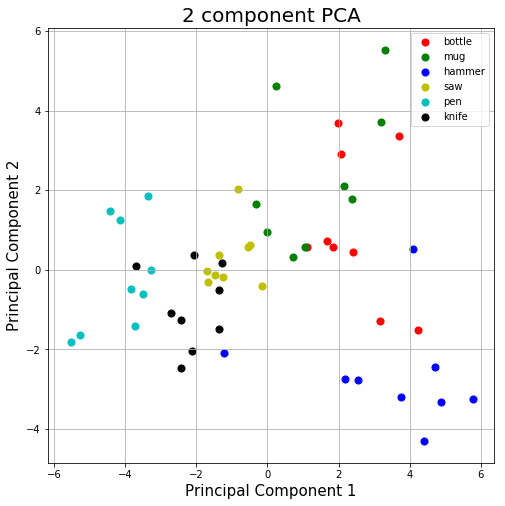

In [345]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['bottle', 'mug', 'hammer', 'saw', 'pen', 'knife']

colors = ['r', 'g', 'b', 'y', 'c', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[24] == '\''+ target +'\''
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()